In [1]:
# check the performance benchmarks between two versions
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "gtracr"))

from trajectory import Trajectory
from constants import EARTH_RADIUS

import time

In [2]:
traj1 = Trajectory(
        "p+",
        latitude=0.,
        longitude=0.,
        detector_altitude=100.,
        zenith_angle=0.,
        azimuth_angle=0.,
        particle_altitude=100.,
        rigidity=40.,
        bfield_type="dipole"
    )

traj2 = Trajectory(
        "p+",
        latitude=0.,
        longitude=0.,
        detector_altitude=100.,
        zenith_angle=0.,
        azimuth_angle=0.,
        particle_altitude=100.,
        rigidity=40.,
        bfield_type="dipole"
    )

In [5]:
max_iter = 100    # maximum number of iterations
# initialize performance benchmark time arrays
time_arr1 = np.zeros(max_iter)
time_arr2 = np.zeros(max_iter)

In [6]:
for i in range(max_iter):
    # evaluate for the first trajectory type
    start_time1 = time.time()
    trajdata1 = traj1.get_trajectory(dt=1e-5, max_time=0.05, max_step=1000, use_python=True)  # 1000 iterations with dt=1e-5, max_time=0.05s
    stop_time1 = time.time()
    time_arr1[i] = stop_time1 - start_time1
    # evaluate for the second trajectory type
    start_time2 = time.time()
    trajdata2 = traj2.get_trajectory(dt=1e-5, max_time=0.05, max_step=1000)  # 1000 iterations with dt=1e-5, max_time=0.05s
    stop_time2 = time.time()
    time_arr2[i] = stop_time2 - start_time2

In [19]:
# get the average value of the time for each trajectory version
avg_time1 = np.sum(time_arr1) / max_iter
avg_time2 = np.sum(time_arr2) / max_iter

avg_timearr = np.array([avg_time1, avg_time2]) / avg_time2   # normalized to C++ version

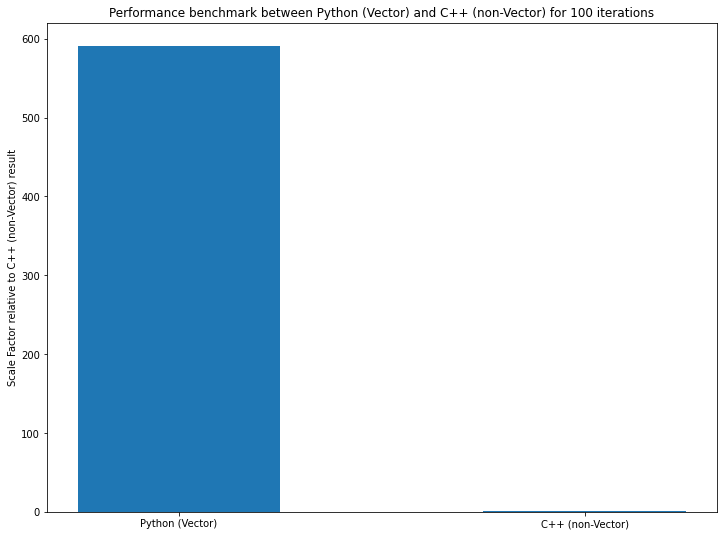

In [23]:
 # the labels, needs to be modified every time different modification is used
labels = ["Python (Vector)", "C++ (non-Vector)"] 
label_pos = np.arange(len(labels))
width = 0.5
# plot the histogram comparing the two values
fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')
ax.bar(label_pos, avg_timearr, width)
ax.set_xticks(label_pos)
ax.set_xticklabels(labels)
# ax.set_ylabel("Time [s]")
ax.set_ylabel("Scale Factor relative to {:s} result".format(labels[1]))
ax.set_title("Performance benchmark between {:s} and {:s} for {:d} iterations".format(*labels, max_iter))

PLOT_DIR = os.path.join(os.getcwd(), "..", "..", "..", "gtracr_plots")

savefig_labels = ["pyvec", "cpp_novec"]
plt.savefig(os.path.join(PLOT_DIR, "{:s}_vs_{:s}_benchmark.png".format(*savefig_labels)), bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(max_iter):
    start_time2 = time.time()
    trajdata2 = traj2.get_trajectory(dt=1e-5, max_time=0.05, max_step=10000, use_python=True)  # 1000 iterations with dt=1e-5, max_time=0.05s
    stop_time2 = time.time()
    time_arr2[i] = stop_time2 - start_time2